In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
import seaborn as sns

In [40]:
%matplotlib inline

In [41]:
import json

In [42]:
with open('logins.json') as json_file:
    data = json.load(json_file)

# Part 1- Exploratory Data analysis

In [43]:
data

{'login_time': ['1970-01-01 20:13:18',
  '1970-01-01 20:16:10',
  '1970-01-01 20:16:37',
  '1970-01-01 20:16:36',
  '1970-01-01 20:26:21',
  '1970-01-01 20:21:41',
  '1970-01-01 20:12:16',
  '1970-01-01 20:35:47',
  '1970-01-01 20:35:38',
  '1970-01-01 20:47:52',
  '1970-01-01 20:26:05',
  '1970-01-01 20:31:03',
  '1970-01-01 20:34:46',
  '1970-01-01 20:36:34',
  '1970-01-01 20:39:25',
  '1970-01-01 20:40:37',
  '1970-01-01 20:34:58',
  '1970-01-01 20:43:59',
  '1970-01-01 20:47:46',
  '1970-01-01 20:46:34',
  '1970-01-01 20:56:07',
  '1970-01-01 20:49:12',
  '1970-01-01 20:59:06',
  '1970-01-01 20:59:59',
  '1970-01-01 21:15:01',
  '1970-01-01 21:09:24',
  '1970-01-01 21:19:24',
  '1970-01-01 21:20:53',
  '1970-01-01 21:29:19',
  '1970-01-01 21:58:05',
  '1970-01-01 21:51:51',
  '1970-01-01 21:59:40',
  '1970-01-01 22:08:34',
  '1970-01-01 22:02:51',
  '1970-01-01 21:58:32',
  '1970-01-01 22:02:31',
  '1970-01-01 22:05:32',
  '1970-01-01 22:02:46',
  '1970-01-01 22:10:28',
  '1970-01-

In [44]:
data_df = pd.DataFrame(data)

In [45]:
data_df.head(20)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
5,1970-01-01 20:21:41
6,1970-01-01 20:12:16
7,1970-01-01 20:35:47
8,1970-01-01 20:35:38
9,1970-01-01 20:47:52


In [46]:
data_ser = pd.Series(data['login_time'])

In [47]:
data_ser

0        1970-01-01 20:13:18
1        1970-01-01 20:16:10
2        1970-01-01 20:16:37
3        1970-01-01 20:16:36
4        1970-01-01 20:26:21
                ...         
93137    1970-04-13 18:50:19
93138    1970-04-13 18:43:56
93139    1970-04-13 18:54:02
93140    1970-04-13 18:57:38
93141    1970-04-13 18:54:23
Length: 93142, dtype: object

In [48]:
data_ser.dtype

dtype('O')

In [49]:
a = pd.to_datetime(data_ser)

In [50]:
data_ser_new = a

In [51]:
data_ser_new.dtype

dtype('<M8[ns]')

In [52]:
new_df = pd.to_datetime(data_df['login_time'])

In [53]:
first_df = pd.DataFrame(index = new_df)

In [54]:
first_df['Counts'] = range(0,93142)

In [55]:
main_df = first_df.resample('15T').sum()

In [56]:
main_df['col_1'] = main_df.index

In [57]:
first_df.drop('col', axis=1, inplace=True)

KeyError: "['col'] not found in axis"

In [ ]:
first_df

# The json data was loaded into a data frame with 15 minute intervals and the frequency of log-ins for each interval

In [204]:
main_df

,Counts,col_1
login_time,,
1970-01-01 20:00:00,6,1970-01-01 20:00:00
1970-01-01 20:15:00,25,1970-01-01 20:15:00
1970-01-01 20:30:00,113,1970-01-01 20:30:00
1970-01-01 20:45:00,132,1970-01-01 20:45:00
1970-01-01 21:00:00,25,1970-01-01 21:00:00
...,...,...
1970-04-13 17:45:00,465593,1970-04-13 17:45:00
1970-04-13 18:00:00,465623,1970-04-13 18:00:00
1970-04-13 18:15:00,186251,1970-04-13 18:15:00


In [ ]:
main_df

## Plotting the data

Text(0, 0.5, 'Log-in Frequency')

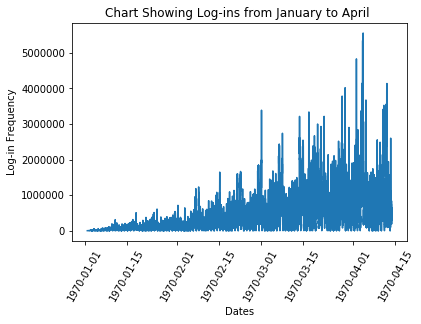

In [203]:
plt.plot(main_df['col_1'],main_df['Counts'])
plt.xticks(rotation=60)
plt.title("Chart Showing Log-ins from January to April ")
plt.xlabel('Dates')
plt.ylabel('Log-in Frequency')

# Part 2 - Experiment and metrics design

1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?

I would measure the average length of the trips. I believe this would be good because if drivers are available to both cities, there would be an increase in trips traversing both cities with would subsequently increase the average trip length. 

 2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

A practical experiment would be to implement proposed toll reimbursements, and start an ad campaign around it. This should get more riders interested in driving between cities. I would use a simple T-test to look for any statistical significance. I would simply compare average driving distance before and after the ad campaign.  

# Part 3 - Predictive Modeling

In [76]:
with open('ultimate_data_challenge.json') as ultimate_json:
    ultimate_data = json.load(ultimate_json)

In [77]:
ultimate_data_df = pd.DataFrame(ultimate_data)

In [78]:
ultimate_data_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [79]:
ultimate_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


## The data shows that there are 50,000 rows. Almost all are non-null save for a few in the phone nad avg_rating by_driver category. The avg_rating_of_driver has considerable less data so I will use the avg driver rating to fill these

In [80]:
ultimate_data_df['avg_rating_by_driver'].fillna(ultimate_data_df['avg_rating_by_driver'].mean(), inplace=True)

In [81]:
ultimate_data_df['avg_rating_by_driver'].mean()

4.778158195947453

In [82]:
ultimate_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    50000 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [83]:
ultimate_data_df['avg_rating_of_driver'].fillna(ultimate_data_df['avg_rating_of_driver'].mean(), inplace=True)

In [84]:
ultimate_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    50000 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    50000 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [85]:
ultimate_data_df.phone.value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

There were significantly more iphones than android phones, so it would be reasonable fill the null values in phone with iphone

In [86]:
ultimate_data_df.phone.fillna('iPhone', inplace=True)

In [87]:
ultimate_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    50000 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   50000 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    50000 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [88]:
#All null values have been filled. 

In [89]:
ultimate_data_df.corr()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
trips_in_first_30_days,1.000000,-0.011060,-0.001841,0.005720,0.112210,0.050388,-0.136329,-0.039097
avg_rating_of_driver,-0.011060,1.000000,-0.021653,-0.003290,-0.001916,0.012587,0.028508,0.101660
avg_surge,-0.001841,-0.021653,1.000000,0.793582,-0.078791,-0.110071,-0.081491,0.010498
surge_pct,0.005720,-0.003290,0.793582,1.000000,-0.106861,-0.144918,-0.104414,0.019964
ultimate_black_user,0.112210,-0.001916,-0.078791,-0.106861,1.000000,0.035998,0.032310,0.009328
weekday_pct,0.050388,0.012587,-0.110071,-0.144918,0.035998,1.000000,0.101652,0.020366
avg_dist,-0.136329,0.028508,-0.081491,-0.104414,0.032310,0.101652,1.000000,0.079793
avg_rating_by_driver,-0.039097,0.101660,0.010498,0.019964,0.009328,0.020366,0.079793,1.000000


In [90]:
ultimate_data_df

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.700000,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.000000,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.300000,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.600000,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.400000,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.000000,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,4.601559,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.000000,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.000000,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


# Include a few visualizations

### Distribution of Customer status

Text(0.5, 1.0, 'People who were still customers vs people who were not')

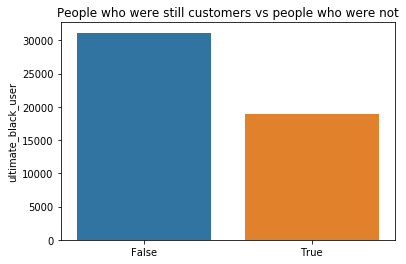

In [125]:
#Visualization for distribution of Ultimate black User
sns.barplot(x = ['False','True'] ,y = ultimate_data_df['ultimate_black_user'].value_counts(), data=ultimate_data_df  )
plt.title('People who were still customers vs people who were not')

In [114]:
ultimate_data_df['ultimate_black_user'].value_counts()

False    31146
True     18854
Name: ultimate_black_user, dtype: int64

### The data shows that the majority of people who signed up had not used the service

### Distribution of the cities 

In [137]:
ultimate_data_df['city'].value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

Text(0.5, 0, 'City')

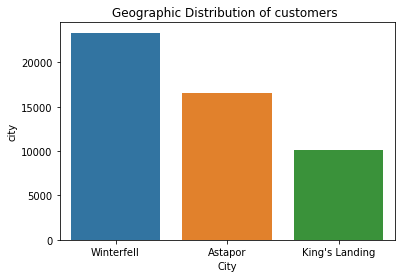

In [148]:
sns.barplot(x = ['Winterfell','Astapor',"King's Landing"],y= ultimate_data_df['city'].value_counts(), data=ultimate_data_df)
plt.title('Geographic Distribution of customers ')
plt.xlabel('City')

Text(0.5, 1.0, 'Number of trips in first 30 days')

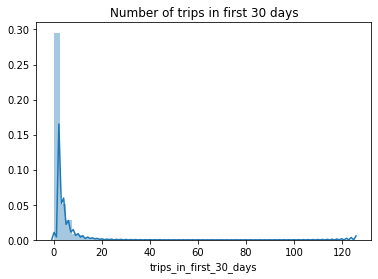

In [144]:
sns.distplot(ultimate_data_df['trips_in_first_30_days'])
plt.title('Number of trips in first 30 days')

In [149]:
ultimate_data_df['trips_in_first_30_days'].mean()

2.2782

The majority of people took less than 10 trips in the first 30 days, while the average number was 2.28 trips. 

### The Average Rating of the Driver by customers

Text(0.5, 1.0, 'Average Rating of Driver')

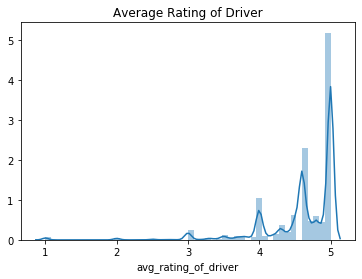

In [146]:
sns.distplot(ultimate_data_df['avg_rating_of_driver'])
plt.title("Average Rating of Driver")

### The Average Rating by the driver to customers

Text(0.5, 1.0, 'Average Rating by Driver')

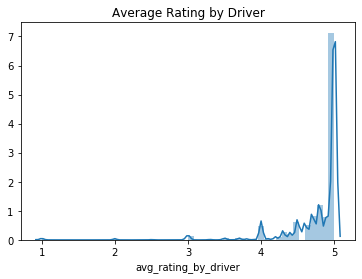

In [147]:
sns.distplot(ultimate_data_df['avg_rating_by_driver'])
plt.title("Average Rating by Driver")

## Before Training the model it is necessary to convert city and phone categories to numeric variables to ensure they can be properly trained in machine learning model

In [165]:
dummy_1 = pd.get_dummies(ultimate_data_df['phone'])

In [166]:
#Only one is needed
dummy_1

,Android,iPhone
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
49995,0,1
49996,0,1
49997,1,0
49998,0,1


In [167]:
dummy_1.drop('Android', axis=1, inplace=True)

In [168]:
dummy_1

,iPhone
0,1
1,0
2,1
3,1
4,0
...,...
49995,1
49996,1
49997,0
49998,1


### Time to create dummy variables for the cities 

In [169]:
dummy_2 = pd.get_dummies(ultimate_data_df['city'])

In [171]:
#only 2 are needed
dummy_2

,Astapor,King's Landing,Winterfell
0,0,1,0
1,1,0,0
2,1,0,0
3,0,1,0
4,0,0,1
...,...,...,...
49995,0,1,0
49996,1,0,0
49997,0,0,1
49998,1,0,0


In [172]:
dummy_2.drop('Winterfell', axis = 1, inplace=True)

In [173]:
dummy_2.head()

,Astapor,King's Landing
0,0,1
1,1,0
2,1,0
3,0,1
4,0,0


## Time to join dummy_1 and dummy 2 to original dataframe

In [179]:
new_ultimate_data_df = pd.concat([ultimate_data_df,dummy_1,dummy_2], axis = 1)

In [181]:
#Need to top the unnecessary columns such as city and phone 
new_ultimate_data_df

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,iPhone,Astapor,King's Landing
0,King's Landing,4,2014-01-25,4.700000,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1,0,1
1,Astapor,0,2014-01-29,5.000000,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0,1,0
2,Astapor,3,2014-01-06,4.300000,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1,1,0
3,King's Landing,9,2014-01-10,4.600000,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1,0,1
4,Winterfell,14,2014-01-27,4.400000,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.000000,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2,1,0,1
49996,Astapor,1,2014-01-24,4.601559,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0,1,1,0
49997,Winterfell,0,2014-01-31,5.000000,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0,0,0,0
49998,Astapor,2,2014-01-14,3.000000,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5,1,1,0


In [182]:
new_ultimate_data_df.drop(['city','phone'], axis=1, inplace=True)

In [185]:
new_ultimate_data_df.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,iPhone,Astapor,King's Landing
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,True,46.2,3.67,5.0,1,0,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,False,50.0,8.26,5.0,0,1,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,False,100.0,0.77,5.0,1,1,0
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,True,80.0,2.36,4.9,1,0,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,False,82.4,3.13,4.9,0,0,0


In [161]:
 #Time to make the model. I will use the ultimate_black_user as target variable and the rest of the table as the X in 
#a logistic regression/ decision tree classifier

In [162]:
#The first step is to break up the data into a 75-25 split (training data, test data, and validation data)

In [187]:
X = new_ultimate_data_df.copy()
y = new_ultimate_data_df['ultimate_black_user'].copy()

In [188]:
X.drop(['ultimate_black_user','signup_date','last_trip_date'], axis=1, inplace=True)

In [189]:
X

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,iPhone,Astapor,King's Landing
0,4,4.700000,1.10,15.4,46.2,3.67,5.0,1,0,1
1,0,5.000000,1.00,0.0,50.0,8.26,5.0,0,1,0
2,3,4.300000,1.00,0.0,100.0,0.77,5.0,1,1,0
3,9,4.600000,1.14,20.0,80.0,2.36,4.9,1,0,1
4,14,4.400000,1.19,11.8,82.4,3.13,4.9,0,0,0
...,...,...,...,...,...,...,...,...,...,...
49995,0,5.000000,1.00,0.0,100.0,5.63,4.2,1,0,1
49996,1,4.601559,1.00,0.0,0.0,0.00,4.0,1,1,0
49997,0,5.000000,1.00,0.0,100.0,3.86,5.0,0,0,0
49998,2,3.000000,1.00,0.0,100.0,4.58,3.5,1,1,0


In [93]:
from sklearn.model_selection import train_test_split


In [186]:
from sklearn.tree import DecisionTreeClassifier

In [193]:
from sklearn.model_selection import cross_val_score

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [191]:
#instantiating the Decision Tree Classifer
clf = DecisionTreeClassifier()

In [192]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [194]:
pred = clf.predict(X_test)

In [200]:
from sklearn.metrics import confusion_matrix

In [201]:
confusion_matrix(pred,y_test)

array([[4919, 2839],
       [2785, 1957]])

# 2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.


I chose a decision tree because I know these tend to be accurate and do not require normalization of scaling of data.
It is also not influenced greatly by any extreme data. The model is not the most accurate predictor due to a relatively small data set, and also it requires extensive extrapolation, an insight which is very difficult to get from this data. 

## 3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

Ultimate can leverage the insights seen here by getting a rough idea of how many people will remain with the company. There was a high level of tue positives reported so This should help with that particular insight.